# Setup

In [662]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Perceptron Class

In [663]:
class Perceptron:
    """
    Perceptron class
    """
    def __init__(self,activation:str="sigmoid"):
        """_summary_

        Args:
            input: array of inputs including the bias
            activation (str): one of the follwing [sigmoid,tanh,relu,leakyRelu,softmax].
            Defaults to "sigmoid".
        """
        self.activation = activation
        self.avalaibleActivations = {
            "sigmoid":self.sigmoid,
            "tanh":self.tanh,
            "relu":self.relu,
            "leakyRelu":self.leakyRelu,
      
        }
        assert activation in self.avalaibleActivations.keys(), f"The activation function {self.activation} is not available"
    # global access variables
    SIGMOID, TANH, RELU, LEAKY_RELU = ["sigmoid","tanh","relu","leakyRelu"] 
    
    def sigmoid(self,x):
        """
        Sigmoid function
        """
        return 1 / (1+np.exp(-x))
    
    def tanh(self,x):
        """
        Tanh function
        """
        return np.tanh(x)
    
    def relu(self,x):
        """
        Relu function
        """
        return np.max(0,x)
    
    def leakyRelu(self,x):
        """
        Leaky Relu function
        """
        return x if x > 0 else 0.01 * x
    
   
        """
        Derivative of the Leaky ReLU function
        """
        return 1.0 if x > 0 else 0.01
    
    def activate(self,input)->float:
        """_summary_
         return the activation function of the input
        Args:
            input (_type_): _description_

        Returns:
            float: the activated input
        """
        return self.avalaibleActivations.get(self.activation)(input)
    
    def forward(self,input)-> float:
        """_summary_
        return the output of the perceptron
        Returns:
            float: the output
        """
        output = np.sum(input)
        return self.activate(output)
    
    def __str__(self) -> str:
        """_summary_

        Returns:
            str: _description_
        """
        return f"Perceptron with activation function {self.activation}"
            
        

In [664]:
p1 = Perceptron(Perceptron.LEAKY_RELU)
p1.forward(np.array([-0.2,0.1]))

-0.001

In [665]:
print(p1)

Perceptron with activation function leakyRelu


# XOR function

### Generating the data

In [666]:
nbSamples = 1000
X = pd.DataFrame({
    "x1":np.random.binomial(1,0.5,nbSamples),
    "x2":np.random.binomial(1,0.5,nbSamples),
})

y = pd.Series(np.bitwise_xor(X["x1"],X["x2"]),name="y")

In [667]:
X.head()

,x1,x2
0,1,1
1,0,0
2,0,0
3,1,1
4,1,0


In [668]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: y, dtype: int32

Figure

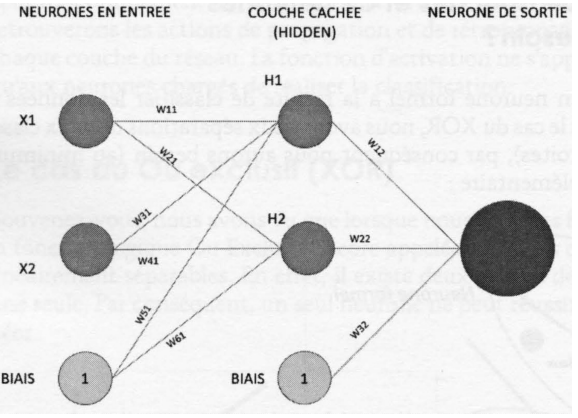

#### init weights

In [669]:
w11 = -0.166
w21 = 0.441
w31 = -0.999
w41 = -0.395
# hidden layer
w12 = -0.707
w22 = -0.8165
# bias
w51 = 0.
w61 = 0.
w32 = 0.

# Layer class

In [670]:
class FullyConnectedLayer:
    def __init__(self,numberOfPerceptrons,weights,bias,actFuncs=None):
        if actFuncs is not None:
            assert len(weights) == numberOfPerceptrons, "The number of weights must be equal to the number of perceptrons"
        else:
            self.actFuncs = [Perceptron.SIGMOID for i in range(numberOfPerceptrons)]
        assert len(bias) == numberOfPerceptrons, "The number of bias must be equal to the number of perceptrons"
        assert numberOfPerceptrons == np.shape(weights)[0], "The number of perceptrons must be equal to the number of weights"
        self.numberOfPerceptrons = numberOfPerceptrons
        self.weights = weights
        self.bias = bias
        self.perceptrons = [Perceptron(actFunc) for actFunc in self.actFuncs]
    
    def forward(self,input):
        preActivation = [np.multiply(input,self.weights[i]) + self.bias[i] for i in range(np.shape(self.weights)[0])]
        return [self.perceptrons[i].forward(preActivation[i]) for i in range(np.shape(self.weights)[0])]   
    
    def updateWeights(self,weights):
        assert len(weights) == self.numberOfPerceptrons, "The number of weights must be equal to the number of perceptrons"
        self.weights = weights
        
    def updateBias(self,bias):
        assert len(bias) == self.numberOfPerceptrons, "The number of bias must be equal to the number of perceptrons"
        self.bias = bias
    
    def __str__(self) -> str:
        return f"Fully connected layer with {self.numberOfPerceptrons} perceptrons\n Weights: {self.weights}\n Bias: {self.bias}\n Activation functions: {self.actFuncs}"
        

In [671]:
layer1 = FullyConnectedLayer(2,weights=[[w11,w21],[w31,w41]],bias=[w51,w61])
print(layer1)

Fully connected layer with 2 perceptrons
 Weights: [[-0.166, 0.441], [-0.999, -0.395]]
 Bias: [0.0, 0.0]
 Activation functions: ['sigmoid', 'sigmoid']


In [672]:
layer2 = FullyConnectedLayer(1,weights=[[w21,w22]],bias=[w32])
print(layer2)

Fully connected layer with 1 perceptrons
 Weights: [[0.441, -0.8165]]
 Bias: [0.0]
 Activation functions: ['sigmoid']


**The forward prop equations**
$$
f_1 = w_{11} * x_1 + w_{21} * x_2 + w_{51}
\\{}\\
h_1 = sigmoid(f_1)
\\{}\\
f_2 = w_{31} * x_1 + w_{41} * x_2 + w_{61}
\\{}\\
h_2 = sigmoid(f_2)
\\{}\\
f_3 = w_{12} * h_1 + w_{22} * h_2 + w_{32}
\\{}\\
\hat{y}=h_3 = sigmoid(f_3)
\\{}\\
$$


**After applying the chain rule we found those equations:**
$$
E = y - \hat{y}
\\{}\\
\frac{dE}{dw_{12}}=\frac{dE}{df_3}*\frac{df_3}{dw_{12}} =-\hat{y}(1-{\hat{y}})*h_1
\\{}\\
\frac{dE}{dw_{22}}=\frac{dE}{df_3}*\frac{df_3}{dw_{22}} =-\hat{y}(1-{\hat{y}})*h_2
\\{}\\
\frac{dE}{dw_{32}}=\frac{dE}{df_3}*\frac{df_3}{dw_{32}} =-\hat{y}(1-{\hat{y}})
\\{}\\
\\{}\\
\frac{dE}{dw_{11}}=\frac{dE}{df_3}*\frac{df_3}{dh_{1}}*\frac{dh_1}{df_{1}}*\frac{df_1}{dw_{11}} =
\\{}\\
-\hat{y}(1-{\hat{y}})*w_{12}*h_1(1-h_1)*x1
\\{}\\
\\{}\\
\frac{dE}{dw_{21}}=\frac{dE}{df_3}*\frac{df_3}{dh_{1}}*\frac{dh_1}{df_{1}}*\frac{df_1}{dw_{21}} =
\\{}\\
-\hat{y}(1-{\hat{y}})*w_{12}*h_1(1-h_1)*x2
\\{}\\
\\{}\\
\frac{dE}{dw_{31}}=\frac{dE}{df_3}*\frac{df_3}{dh_{2}}*\frac{dh_2}{df_{2}}*\frac{df_2}{dw_{31}} =
\\{}\\
-\hat{y}(1-{\hat{y}})*w_{22}*h_2(1-h_2)*x1
\\{}\\
\\{}\\
\frac{dE}{dw_{41}}=\frac{dE}{df_3}*\frac{df_3}{dh_{2}}*\frac{dh_2}{df_{2}}*\frac{df_2}{dw_{41}} =
\\{}\\
-\hat{y}(1-{\hat{y}})*w_{22}*h_2(1-h_2)*x2
\\{}\\
\\{}\\
\frac{dE}{dw_{51}}=\frac{dE}{df_3}*\frac{df_3}{dh_{1}}*\frac{dh_1}{df_{1}}*\frac{df_1}{dw_{51}} =
\\{}\\
-\hat{y}(1-{\hat{y}})*w_{12}*h_1(1-h_1)
\\{}\\
\\{}\\
\frac{dE}{dw_{61}}=\frac{dE}{df_3}*\frac{df_3}{dh_{2}}*\frac{dh_2}{df_{2}}*\frac{df_2}{dw_{61}} =
\\{}\\
-\hat{y}(1-{\hat{y}})*w_{22}*h_2(1-h_2)
$$


# Neural Net class

In [680]:
class NeuralNetwork:
    def __init__(self,layers:[FullyConnectedLayer],learninigRate=0.1):
        # reseting the weights
        _w11 = -0.166
        _w21 = 0.441
        _w31 = -0.999
        _w41 = -0.395
        # hidden layer
        _w12 = -0.707
        _w22 = -0.8165
        # bias
        _w51 = 0.
        _w61 = 0.
        _w32 = 0.
        layer1.updateWeights([[_w11,_w21],[_w31,_w41]])
        layer1.updateBias([_w51,_w61])
        layer2.updateWeights([[_w12,_w22]])
        layer2.updateBias([_w32])
            
        self.histErrors = []
        self.learninigRate = learninigRate
        self.layers:[FullyConnectedLayer] = layers
        self.lastYHats = np.array([])
        self.lastForwardProp = np.array([])
        assert len(layers) == 2 , 'This example works only with two layers and only sigmoid function'
    def error(self,y,yHat):
        return y - yHat
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forwardProp(self,X:pd.DataFrame,includeInTraining=False):
        """
        making it for only two layer as in our examlpe it can be more flexible
        """
        yHats = []
        history = []
        layer1:FullyConnectedLayer = self.layers[0]
        layer2:FullyConnectedLayer = self.layers[1]
        for x in X.itertuples():
            _,x1,x2 = x
            # forwarding the first layer
            layer1Output = layer1.forward([x1,x2])
           
            # forwading the second and the last layer
            yHat = layer2.forward(layer1Output)
            yHats.append(yHat)
            if includeInTraining:
                
                history.append([{
                    'actFunction':layer1.actFuncs,
                    'output':layer1Output
                    },{
                    'actFunction':layer2.actFuncs,
                    'output':yHat
                    }])
            # making it as the last yHat calculated
            self.histErrors.append(self.error(y,yHat).mean())
            self.lastYHats = np.array(yHats)
            self.lastForwardProp = np.array(history)
        return yHats
    
    def backPropagation(self,X: pd.DataFrame,debug=False):
        # calculating the gradients according to the equations above
        layer1:FullyConnectedLayer = self.layers[0]
        layer2:FullyConnectedLayer = self.layers[1]
        w11 = layer1.weights[0][0]
        w21 = layer1.weights[0][1]
        w31 = layer1.weights[1][0]
        w41 = layer1.weights[1][1]
        w12 = layer2.weights[0][0]
        w22 = layer2.weights[0][1]
        w51 = layer1.bias[0]
        w61 = layer1.bias[1]
        w32 = layer2.bias[0]
        if debug:
            print(f'old w12: {w12}')
            print(f'old w22: {w22}')
            print(f'old w32: {w32}')
            print(f'old w11: {w11}')
            print(f'old w21: {w21}')
            print(f'old w31: {w31}')
            print(f'old w41: {w41}')
            print(f'old w51: {w51}')
            print(f'old w61: {w61}')
        
        nbExamples = np.shape(X)[0]
        h1 = np.array([layer['output'][0] for layer in self.lastForwardProp[:,0]])
        h2 = np.array([layer['output'][1] for layer in self.lastForwardProp[:,0]])
        x1 = X['x1'].to_numpy()
        x2 = X['x2'].to_numpy()
        gradE = - np.multiply(self.lastYHats ,(1 - self.lastYHats))
        gradH1 = np.multiply(h1,(1 - h1))
        gradH2 = np.multiply(h2,(1 - h2))
        gradW12 = gradE.transpose().dot(h1) / nbExamples
        gradW22 = gradE.transpose().dot(h2) / nbExamples
        gradW32 = gradE.mean()
        gradW11 = gradE.transpose().dot(gradH1 * x1) * w12 / nbExamples 
        gradW21 = gradE.transpose().dot(gradH1 * x2) * w12 / nbExamples
        gradW31 = gradE.transpose().dot(gradH2 * x1) * w22 / nbExamples
        gradW41 = gradE.transpose().dot(gradH2 * x2) * w22 / nbExamples
        gradW51 = gradE.transpose().dot(gradH2) * w12 / nbExamples
        gradW61 = gradE.transpose().dot(gradH2) * w22 / nbExamples
        
        
        # updating the weights
        w12 = w12 - self.learninigRate * gradW12
        w22 = w22 - self.learninigRate * gradW22
        w11 = w11 - self.learninigRate * gradW11
        w21 = w21 - self.learninigRate * gradW21
        w31 = w31 - self.learninigRate * gradW31
        w41 = w41 - self.learninigRate * gradW41
        w51 = w51 - self.learninigRate * gradW51
        w61 = w61 - self.learninigRate * gradW61
        
        layer1.updateWeights([[w11,w21],[w31,w41]])
        layer1.updateBias([w51,w61])
        layer2.updateWeights([[w21,w22]])
        layer2.updateBias([w32])
        self.layers = [layer1,layer2]
        if debug:
            print('-------------------')        
            print(f'gradW12: {gradW12}')
            print(f'gradW22: {gradW22}')
            print(f'gradW32: {gradW32}')
            print(f'gradW11: {gradW11}')       
            print(f'gradW21: {gradW21}')
            print(f'gradW31: {gradW31}')
            print(f'gradW41: {gradW41}')
            print(f'gradW51: {gradW51}')
            print(f'gradW61: {gradW61}')
            print('-------------------')
            print(f'new w12: {w12}')
            print(f'new w22: {w22}')
            print(f'new w32: {w32}')
            print(f'new w11: {w11}')
            print(f'new w21: {w21}')
            print(f'new w31: {w31}')
            print(f'new w41: {w41}')
            print(f'new w51: {w51}')
            print(f'new w61: {w61}')
        
    def train(self,X:pd.DataFrame,y:pd.Series,deltaError=0.01):
        # first time to calculate the error
        self.forwardProp(X,includeInTraining=True)
        self.backPropagation(X)
        while np.abs(self.error(y.to_numpy(),self.lastYHats).mean()) > deltaError:
            self.forwardProp(X,includeInTraining=True)
            self.backPropagation(X)
        return 
    
    def predict(self,X:pd.DataFrame):
        preds = self.forwardProp(X)
        return np.array(preds) > 0.5
    
    def plotError(self):
        ax = plt.subplot()
        ax.plot(self.histErrors,color='r')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('delta Error')
        ax.set_title('Error vs. Epochs')
        plt.show()
    
    

In [681]:
xor_nn = NeuralNetwork(layers=[layer1,layer2],learninigRate=0.1)
xor_nn.train(X,y)


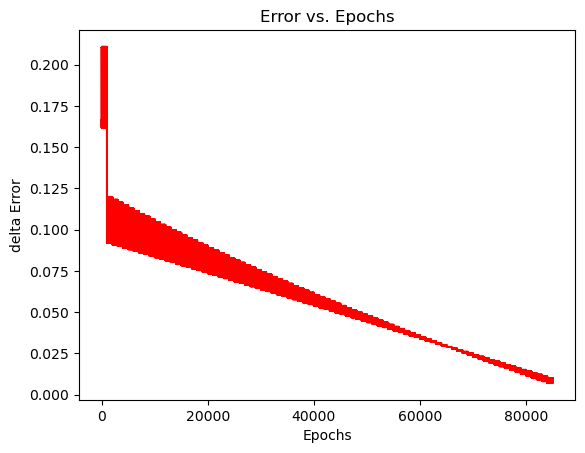

In [682]:
xor_nn.plotError()

**Testing it**

In [687]:
example = (0,0)
xor_nn.predict(pd.DataFrame([example],columns=['x1','x2']))
# something is wrong lets fix ltaer

array([[ True]])

In [679]:
print(xor_nn.lastYHats)

[]
